In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.io import fits
from astropy.stats import mad_std
from photutils.segmentation import detect_sources
import statmorph

In [2]:
path='Savary_training_set_lenses/'
category='Lens_simulations/'
list_files=os.listdir(path+category)

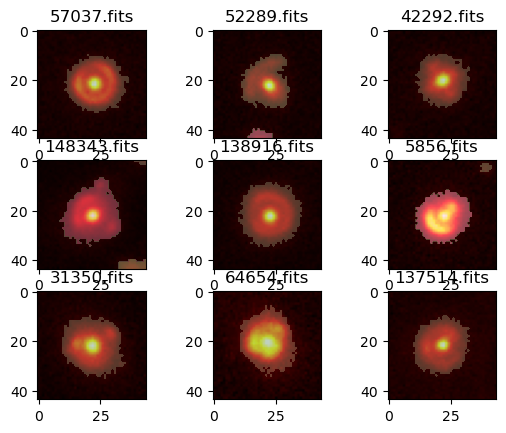

In [3]:
for count, image in zip(range(1,10),list_files[:9]):#No replacement to avoid the displaying of a same picture
    image_file=path+category+image
    get_data, get_header = fits.getdata(image_file, header=True)
    std = mad_std(get_data)
    threshold=2.5*std
    segm = detect_sources(get_data, threshold, npixels=5)
    plt.figure(1)
    plt.subplot(330+count)
    plt.title(image)
    plt.imshow(get_data, cmap='hot')
    plt.imshow(segm.data, cmap=segm.make_cmap(seed=1234),alpha=0.4)
plt.show()

In [7]:
##EXECUTED ONE TIME TO GENERATE THE FILE
'''
one_source=[]

for image in list_files:
    image_file=path+category+image
    get_data, get_header = fits.getdata(image_file, header=True)
    std = mad_std(get_data)
    threshold=2.5*std
    segm = detect_sources(get_data, threshold, npixels=5)
    if segm.nlabels<2:
        one_source.append(image)

len(one_source)


SyntaxError: incomplete input (2351506980.py, line 2)

In [8]:
##EXECUTED ONE TIME TO GENERATE THE FILE
'''
subsample_1000=np.random.choice(one_source, size=1000, replace=False)
np.save('subsample_1000_statmorph',subsample_1000)


SyntaxError: incomplete input (1607000800.py, line 2)

In [6]:
subsample_1000=np.load('subsample_1000_statmorph.npy')

In [7]:
def corner_value(image,len=5):
    dimensions=np.shape(image)
    
    data=image[:len,:len] #up left corner
    data=np.append(data,image[:len,dimensions[0]-len:]) #up right corner
    data=np.append(data,image[dimensions[0]-len:,:len]) #down left corner
    data=np.append(data,image[dimensions[0]-len:,dimensions[1]-len:]) #down right corner
    
    return data

def corner_mask(image,len=5):
    dimensions=np.shape(image)
    mask=np.zeros(dimensions)
    
    mask[:len,:len]=1
    mask[:len,dimensions[0]-len:]=1
    mask[dimensions[0]-len:,:len]=1
    mask[dimensions[0]-len:,dimensions[1]-len:]=1
    
    return mask

In [13]:
mean_bg=[]
std_bg=[]
for file in subsample_1000:
    image_file=path+category+file
    get_data, get_header = fits.getdata(image_file, header=True)
    corners=corner_value(get_data)
    mean_bg.append(np.mean(corners))
    std_bg.append(np.std(corners))

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00476667, 0.10963344, 0.40516707, 0.90566757, 0.95810096,
        0.72930073, 0.50526717, 0.3003003 , 0.21450021, 0.19066686,
        0.10486677, 0.10486677, 0.11440011, 0.04290004, 0.02383336,
        0.01430001, 0.00476667, 0.00476667, 0.        , 0.        ,
        0.        , 0.00476667, 0.        , 0.        , 0.00476667,
        0.        , 0.        , 0.        , 0.        , 0.00476667,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00476667,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

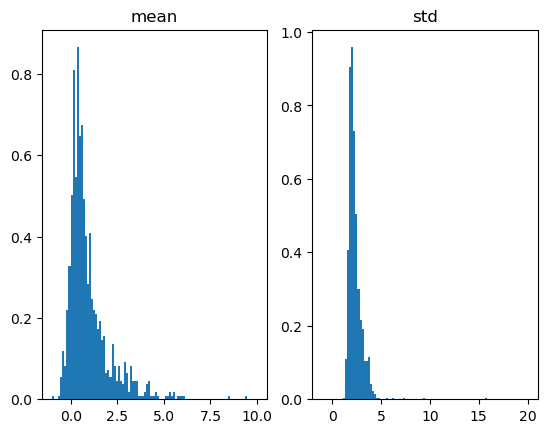

In [14]:
plt.subplot(121)
plt.title('mean')
plt.hist(mean_bg,bins=100,density=True, range=(-1,10))
plt.subplot(122)
plt.title('std')
plt.hist(std_bg,bins=100,density=True, range=(-1,20))

## STATMORPH

In [ ]:
from photutils.background import Background2D, MedianBackground

image=subsample_1000[0]
image_file=path+category+image
get_data, get_header = fits.getdata(image_file, header=True)
bkg_estimator = MedianBackground()

bkg = Background2D(get_data, (10, 10), filter_size=(3, 3),bkg_estimator=bkg_estimator)

plt.imshow(get_data)
plt.show()

get_data -= bkg.background  # subtract the background
plt.imshow(get_data)
plt.show()
plt.imshow(bkg.background)
plt.show()
std = mad_std(get_data)
threshold=3*std
segm = detect_sources(get_data, threshold, npixels=5)
plt.imshow(segm)
plt.show()
plt.imshow(get_data[np.where(segm.data==1)])
plt.show()
gain=500.0
source_morphs = statmorph.source_morphology(get_data, segm, gain=gain)

source_morphs[0]